## Inductively shunted superconducting circuits

In this notebook, we use SQcircuit to find the spectrum of the inductively shunted superconducting circuits based on the following paper:   
_inductively shunted superconducting circuits_  

First, we import the SQcircuit from circuit.py file and specify a number for each nodes on the circuit. The number for each node should be consecutive integer starts from zero(corresponds to circuit ground.) 

In [35]:
from circuit import *
import matplotlib.pyplot as plt

In [38]:
H = q.displace(10,3)

In [41]:
x = H.data

In [45]:
x.todense()

matrix([[ 0.01051048+0.j, -0.03645379+0.j,  0.05986826+0.j,
         -0.15112048+0.j,  0.12213661+0.j, -0.35727688+0.j,
          0.12994541+0.j, -0.57685717+0.j,  0.07462745+0.j,
         -0.68873483+0.j],
        [ 0.03645379+0.j, -0.07415603+0.j,  0.2101949 +0.j,
         -0.14057835+0.j,  0.49665443+0.j, -0.04519417+0.j,
          0.65107456+0.j,  0.13272492+0.j,  0.43460603+0.j,
          0.22388235+0.j],
        [ 0.05986826+0.j, -0.2101949 +0.j,  0.14034985+0.j,
         -0.55179861+0.j, -0.04098594+0.j, -0.59504752+0.j,
         -0.23469891+0.j, -0.05906271+0.j, -0.15670676+0.j,
          0.43492955+0.j],
        [ 0.15112048+0.j, -0.14057835+0.j,  0.55179861+0.j,
          0.07289458+0.j,  0.53655754+0.j,  0.24210089+0.j,
         -0.21970435+0.j,  0.005762  +0.j, -0.49491473+0.j,
         -0.08862489+0.j],
        [ 0.12213661+0.j, -0.49665443+0.j, -0.04098594+0.j,
         -0.53655754+0.j, -0.2332773 +0.j,  0.35364507+0.j,
          0.08563419+0.j,  0.35812379+0.j,  0.005374

<img src="pics/inductivelyShunted_pic1.png" width="300" />

We use Parameter Set for device A of the paper. Note that we added a very small junction $C_x$ to the circuit, because Qcircuit assumes that there is a capacitor between each two nodes of the circuit. If your model does not have a capacitor at specific edge just add a very small capacitor to that edge. 

<img src="pics/inductivelyShunted_pic2.png" width="350" />

We create the object of SQcircuit by initializing it with `circuitParam` dictionary.

In [5]:
circuitParam = {(0, 1): {"C": 20.3 * fF},
                (0, 2): {"C": 0.0001 * fF, "L": 4.5 * nH},
                (0, 3): {"C": 5.3 * fF, "JJ": 6.2 * GHz * 2 * np.pi},
                (1, 2): {"L": 15.6 * nH},
                (2, 3): {"L": 386 * nH}}

# cr1 is an object of SQcircuit
cr1 = SQcircuit(circuitParam)
# call this function to set the truncation number for each mode of the circuit. 
cr1.setTruncationNumbers([1,5,22])

Natural frequencies of the circuit:
[5.37508633e+13 4.95852225e+10 2.19742534e+10]
W transformed matrix:
[[-1.  1.  1.]]


## Circuit Eigenvalues

In [6]:
numEig = 10
phiExt = np.linspace(-0.1, 0.6, 100)*2*np.pi
eigenValues = np.zeros((numEig, len(phiExt)))
for i in range(len(phiExt)):
    cr1.setExternalFluxes({(0, 3): phiExt[i]})
    eigenValues[:, i], _ = cr1.run(numEig)

(0.0, 18.0)

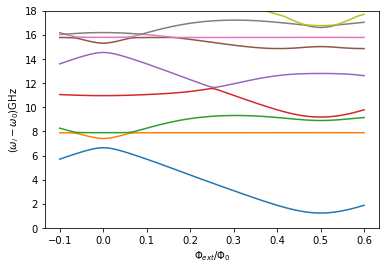

In [7]:
plt.figure()
for i in range(1,numEig):
    plt.plot(phiExt/2/np.pi,(eigenValues[i,:]-eigenValues[0,:]).real/GHz/2/np.pi)

plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("($\omega_i-\omega_0$)GHz")
plt.ylim([0,18])

The next cell shows the spectrum from the figure 2 of the paper, which is the same spectrum that SQcircuit calculated.

<img src="pics/inductivelyShunted_pic3.png" width="380" align = "left" />